<a href="https://colab.research.google.com/github/ozcanelmaci/AI4Future_Image_Embedding/blob/main/Image_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary Python modules and functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from PIL import Image
from tqdm import tqdm
import os

In [ ]:
#Load the VGG model.
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

In [ ]:
#Define the image preprocessing function
def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x

In [ ]:
#Upload a small sample data set of eigth images
from google.colab import files
uploaded = files.upload() # Upload 5–10 JPEG or PNG art images
image_paths = list(uploaded.keys())

Saving pexels-steve-1269968.jpg to pexels-steve-1269968.jpg
Saving pexels-ann-h-45017-3095769.jpg to pexels-ann-h-45017-3095769.jpg
Saving pexels-googledeepmind-17485743.jpg to pexels-googledeepmind-17485743.jpg
Saving pexels-googledeepmind-17485738.jpg to pexels-googledeepmind-17485738.jpg
Saving pexels-steve-1585325.jpg to pexels-steve-1585325.jpg
Saving pexels-steve-1486243.jpg to pexels-steve-1486243.jpg
Saving pexels-steve-1353872.jpg to pexels-steve-1353872.jpg
Saving pexels-paul-blenkhorn-sensoryarthouse-1340564-14365298.jpg to pexels-paul-blenkhorn-sensoryarthouse-1340564-14365298.jpg


In [ ]:
#Use the VGG model to generate embeddings for this data set of six images
embeddings = []

for path in tqdm(image_paths):
  img = preprocess_image(path)
  features = model.predict(img)
  embeddings.append(features.flatten())

embeddings = np.array(embeddings)

  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▎        | 1/8 [00:02<00:15,  2.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 25%|██▌       | 2/8 [00:02<00:07,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 38%|███▊      | 3/8 [00:03<00:05,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 50%|█████     | 4/8 [00:04<00:03,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 62%|██████▎   | 5/8 [00:05<00:02,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 75%|███████▌  | 6/8 [00:06<00:01,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 88%|████████▊ | 7/8 [00:07<00:00,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


In [ ]:
#Visualize image embeddings using dimensionality reduction techniques(PCA and t-SNE)

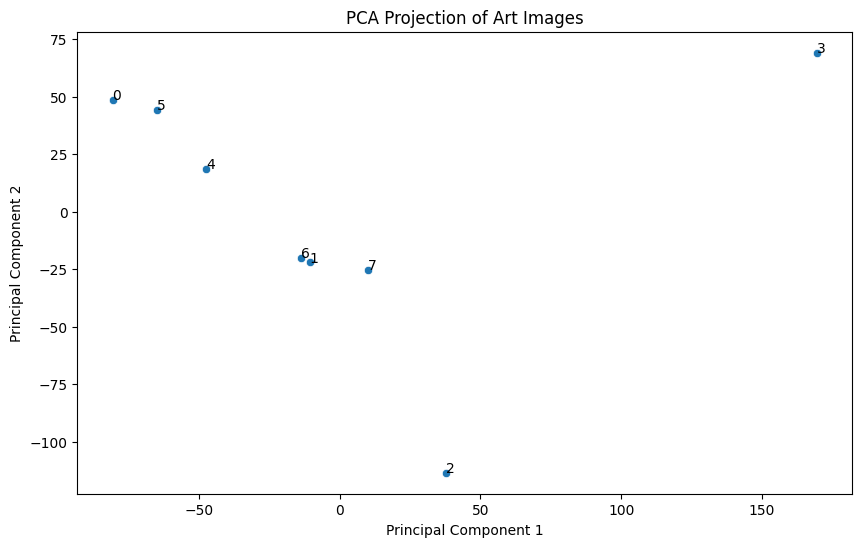

In [ ]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
for i, path in enumerate(image_paths):
  plt.annotate(f"{i}", (pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA Projection of Art Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


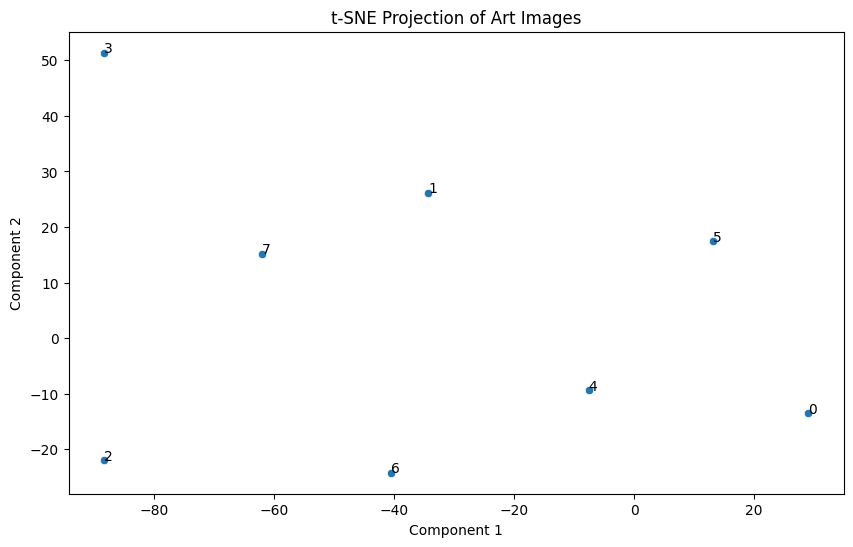

In [ ]:
#t-SNE
tsne = TSNE(n_components=2, perplexity=5, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(embeddings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
for i, path in enumerate(image_paths):
  plt.annotate(f"{i}", (tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE Projection of Art Images")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [ ]:
#Upload test image query
uploaded_test = files.upload()
test_path = list(uploaded_test.keys())[0]
test_img = preprocess_image(test_path)
test_embedding = model.predict(test_img).flatten()

#Test the generated embeddings by uploading a query image to search for visually similar
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity([test_embedding], embeddings)[0]
closest_idx = np.argmax(similarities)
print(f"The uploaded image is most similar to image:{image_paths[closest_idx]}")


Saving Image Query.jpg to Image Query.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
The uploaded image is most similar to image:pexels-googledeepmind-17485738.jpg


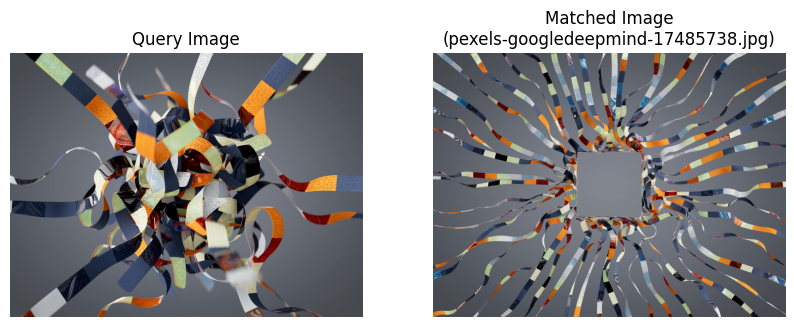

In [ ]:
#Display your query image alongside the image from the data set that matched it the most
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Image.open(test_path))
axes[0].set_title("Query Image")
axes[0].axis("off")
axes[1].imshow(Image.open(image_paths[closest_idx]))
axes[1].set_title(f"Matched Image\n({image_paths[closest_idx]})")
axes[1].axis("off")
plt.show()